In [45]:
import pandas as pd
col_names=['Date', 'Time','Open','High','Low','Close','Tick_Vol']
df = pd.read_csv ('~/anaconda3/envs/FR/GBPUSD1440.csv',names=col_names)
#df = pd.read_csv ('~/anaconda3/envs/FR/EURUSD240.csv',names=col_names,parse_dates=['Date','Time'])
#period = [2020-2-25,2020-3-3]
#df = df.loc[df['Date'].isin(period)]
#print(df[22693-30:])
#print(df['Time'])
#mask = (df['Date'] > '2020-2-24') & (df['Date'] <= '2020-3-3')
#print(df.loc[mask])
#df=df.loc[mask]
#df['DateTime'] = pd.to_datetime(df.pop('Date')) + pd.to_timedelta(df.pop('Time'))
#df['Date'] = pd.to_datetime(df['Date'])
#df['Time'] = pd.to_timedelta(df['Time'])
df['Date'] = df['Date']+' '+df['Time']
print(df)
df['DateTime']=pd.to_datetime(df.pop('Date'))
del df['Time']
print(df.iloc[:,[0]])

                  Date   Time     Open     High      Low    Close  Tick_Vol
0     2012.04.11 00:00  00:00  1.58614  1.59370  1.58513  1.59043     73028
1     2012.04.12 00:00  00:00  1.59037  1.59835  1.59013  1.59578     71598
2     2012.04.13 00:00  00:00  1.59574  1.59685  1.58406  1.58444     66485
3     2012.04.16 00:00  00:00  1.58462  1.59094  1.58180  1.58982     71388
4     2012.04.17 00:00  00:00  1.58983  1.59691  1.58617  1.59228     63791
...                ...    ...      ...      ...      ...      ...       ...
2043  2020.02.28 00:00  00:00  1.28919  1.28972  1.27250  1.28204     71251
2044  2020.03.02 00:00  00:00  1.28123  1.28500  1.27414  1.27518     94297
2045  2020.03.03 00:00  00:00  1.27514  1.28433  1.27391  1.28107     84283
2046  2020.03.04 00:00  00:00  1.28103  1.28716  1.27691  1.28706     67328
2047  2020.03.05 00:00  00:00  1.28703  1.29301  1.28598  1.29083     31750

[2048 rows x 7 columns]
         Open
0     1.58614
1     1.59037
2     1.59574
3     1

In [46]:
quotes = df[-11:].set_index('DateTime')
print(quotes.iloc[:,[0]])

               Open
DateTime           
2020-02-20  1.29223
2020-02-21  1.28822
2020-02-24  1.29449
2020-02-25  1.29251
2020-02-26  1.30037
2020-02-27  1.28970
2020-02-28  1.28919
2020-03-02  1.28123
2020-03-03  1.27514
2020-03-04  1.28103
2020-03-05  1.28703


In [29]:
#Converting data

def trend_dir(quotes):
    import pandas as pd
    import matplotlib.dates as mdates
    import numpy as np
    _quotes = quotes
    y = np.array(_quotes[['Open', 'High', 'Low', 'Close']]).ravel()
    x = np.array(_quotes.index).ravel()
    x = np.array([(lambda d: mdates.date2num(d))(d) for d in x for _ in (0,1,2,3)])
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    if m < 0:
        _dir = 2
    elif m > 0:
        _dir = 3
    else:
        _dir = 'flat' #have to organize check for sideway trend somehow
    return _dir

In [51]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
quotes['Time2'] = quotes.index
quotes['Time2'] = quotes['Time2'].apply(lambda d: mdates.date2num(d.to_pydatetime()))
y = np.array([item for item in quotes.iloc[:,trend_dir(quotes)]])
#y = np.array(quotes[['Open', 'High', 'Low', 'Close']]).ravel()
#x = np.array(_quotes.index).ravel()
print(quotes['High'])
print(y)

DateTime
2020-02-20    1.29275
2020-02-21    1.29799
2020-02-24    1.29539
2020-02-25    1.30172
2020-02-26    1.30072
2020-02-27    1.29459
2020-02-28    1.28972
2020-03-02    1.28500
2020-03-03    1.28433
2020-03-04    1.28716
2020-03-05    1.29301
Name: High, dtype: float64
[1.28482 1.28741 1.28859 1.29136 1.2897  1.28595 1.2725  1.27414 1.27391
 1.27691 1.28598]


In [4]:
tuples = [tuple(x) for x in quotes[['Time2', 'Open', 'High', 'Low',
                                   'Close']].values]
print(tuples)

[(737475.0, 1.29223, 1.29275, 1.28482, 1.28821), (737476.0, 1.2882200000000001, 1.29799, 1.28741, 1.29561), (737479.0, 1.29449, 1.29539, 1.28859, 1.2925), (737480.0, 1.29251, 1.30172, 1.29136, 1.30036), (737481.0, 1.30037, 1.30072, 1.2897, 1.2897), (737482.0, 1.2897, 1.29459, 1.28595, 1.28918), (737483.0, 1.28919, 1.28972, 1.2725, 1.28204), (737486.0, 1.2812299999999999, 1.285, 1.27414, 1.27518), (737487.0, 1.27514, 1.28433, 1.27391, 1.2810700000000002), (737488.0, 1.28103, 1.28716, 1.27691, 1.28706), (737489.0, 1.28703, 1.29301, 1.28598, 1.29083)]


In [5]:
OX_ticks_str = [dateFef.strftime('%Y-%m-%d %H:%M') for dateFef in quotes.index]
OX_ticks_pos = range(len(quotes['Time2']))
print(OX_ticks_str)

['2020-02-20 00:00', '2020-02-21 00:00', '2020-02-24 00:00', '2020-02-25 00:00', '2020-02-26 00:00', '2020-02-27 00:00', '2020-02-28 00:00', '2020-03-02 00:00', '2020-03-03 00:00', '2020-03-04 00:00', '2020-03-05 00:00']


/home/mrp/anaconda3/envs/FR/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


([<matplotlib.lines.Line2D at 0x7fdedfc10ed0>,
  <matplotlib.patches.Rectangle at 0x7fdedfb90150>])

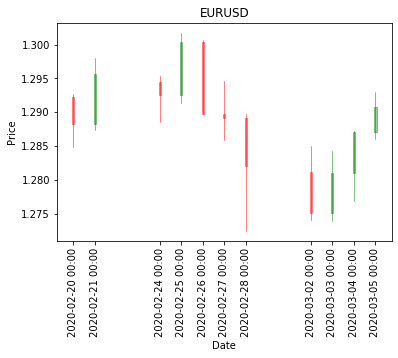

In [6]:
from mpl_finance import candlestick_ohlc as cohlc
fig, ax = plt.subplots()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
plt.xticks(quotes.index, rotation=90)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EURUSD')
cohlc(ax, tuples, width=.1, colorup='g', alpha=.4)